<a href="https://colab.research.google.com/github/RCK04/football-players-stats-24-25-season/blob/main/football_players_stats_24_25_season.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import the libraries
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
import kagglehub;

In [3]:
# Download latest version of the dataset
path = kagglehub.dataset_download("hubertsidorowicz/football-players-stats-2024-2025");

data = pd.read_csv(path + "/players_data_light-2024_2025.csv");
print(data.head());

100%|██████████| 1.17M/1.17M [00:00<00:00, 97.0MB/s]

Extracting files...
   Rk             Player   Nation    Pos        Squad                Comp  \
0   1         Max Aarons  eng ENG     DF  Bournemouth  eng Premier League   
1   2         Max Aarons  eng ENG  DF,MF     Valencia          es La Liga   
2   3     Rodrigo Abajas   es ESP     DF     Valencia          es La Liga   
3   4     James Abankwah   ie IRL  DF,MF      Udinese          it Serie A   
4   5  Keyliane Abdallah   fr FRA     FW    Marseille          fr Ligue 1   

    Age    Born  MP  Starts  ...  Att (GK)  Thr  Launch%  AvgLen  Opp  Stp  \
0  24.0  2000.0   3       1  ...       NaN  NaN      NaN     NaN  NaN  NaN   
1  24.0  2000.0   4       1  ...       NaN  NaN      NaN     NaN  NaN  NaN   
2  21.0  2003.0   1       1  ...       NaN  NaN      NaN     NaN  NaN  NaN   
3  20.0  2004.0   6       0  ...       NaN  NaN      NaN     NaN  NaN  NaN   
4  18.0  2006.0   1       0  ...       NaN  NaN      NaN     NaN  NaN  NaN   

   Stp%  #OPA  #OPA/90  AvgDist  
0   NaN   NaN 

In [7]:
data.describe();

,Rk,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,...,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
count,2854.000000,2846.000000,2846.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,...,212.000000,212.00000,212.000000,212.000000,212.000000,212.000000,211.000000,212.000000,212.000000,208.000000
mean,1427.500000,25.018974,1998.637034,19.012964,13.497547,1211.529082,13.460792,1.682901,1.200771,2.883672,...,491.603774,69.45283,34.138208,33.037264,226.561321,14.377358,6.159716,18.768868,1.164528,13.908654
std,824.023159,4.491624,4.497922,11.502122,11.322991,965.191628,10.724564,3.152732,1.946170,4.530513,...,410.272587,57.99046,14.239612,6.066525,187.816491,13.874832,4.074863,18.276921,1.008750,3.734229
min,1.000000,15.000000,1982.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,714.250000,22.000000,1996.000000,9.000000,3.000000,317.250000,3.500000,0.000000,0.000000,0.000000,...,112.250000,15.75000,25.450000,29.475000,55.750000,2.000000,4.000000,3.000000,0.670000,11.975000
50%,1427.500000,25.000000,1999.000000,20.000000,11.000000,1052.500000,11.700000,0.000000,0.000000,1.000000,...,397.500000,55.00000,33.200000,32.450000,175.500000,10.500000,5.600000,14.000000,1.000000,13.700000
75%,2140.750000,28.000000,2002.000000,30.000000,23.000000,1996.750000,22.200000,2.000000,2.000000,4.000000,...,847.250000,120.25000,41.025000,35.900000,408.000000,22.000000,7.900000,30.250000,1.470000,15.525000
max,2854.000000,41.000000,2008.000000,38.000000,38.000000,3420.000000,38.000000,31.000000,18.000000,47.000000,...,1498.000000,197.00000,92.300000,56.300000,710.000000,64.000000,33.300000,89.000000,10.000000,28.000000


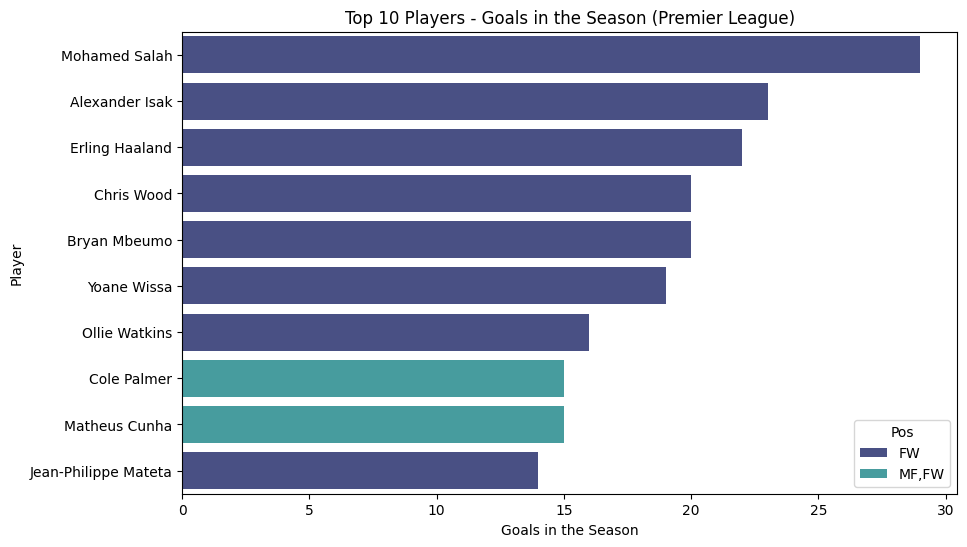

In [40]:
pl_data = data[data['Comp'] == "eng Premier League"];

top10_pl_goals = pl_data.sort_values('Gls', ascending=False).head(10);

# Plot
plt.figure(figsize=(10,6));
sns.barplot(
    x='Gls',
    y='Player',
    data=top10_pl_goals,
    hue='Pos',
    palette='mako',
);
plt.title("Top 10 Players - Goals in the Season (Premier League)");
plt.xlabel("Goals in the Season");
plt.ylabel("Player");
plt.show();

In [41]:
# Create 2 news columns

data['MinsPerMatch'] = np.where(
    data['MP'] > 0,
    data['Min'] / data['MP'],
    0
    );

data['GoalsPerMatch'] = np.where(
    data['MP'] > 0,
    data['Gls'] / data['MP'],
    0
    );

print(data.head());

   Rk             Player   Nation    Pos        Squad                Comp  \
0   1         Max Aarons  eng ENG     DF  Bournemouth  eng Premier League   
1   2         Max Aarons  eng ENG  DF,MF     Valencia          es La Liga   
2   3     Rodrigo Abajas   es ESP     DF     Valencia          es La Liga   
3   4     James Abankwah   ie IRL  DF,MF      Udinese          it Serie A   
4   5  Keyliane Abdallah   fr FRA     FW    Marseille          fr Ligue 1   

    Age    Born  MP  Starts  ...  Launch%  AvgLen  Opp  Stp  Stp%  #OPA  \
0  24.0  2000.0   3       1  ...      NaN     NaN  NaN  NaN   NaN   NaN   
1  24.0  2000.0   4       1  ...      NaN     NaN  NaN  NaN   NaN   NaN   
2  21.0  2003.0   1       1  ...      NaN     NaN  NaN  NaN   NaN   NaN   
3  20.0  2004.0   6       0  ...      NaN     NaN  NaN  NaN   NaN   NaN   
4  18.0  2006.0   1       0  ...      NaN     NaN  NaN  NaN   NaN   NaN   

   #OPA/90  AvgDist  MinsPerMatch  GoalsPerMatch  
0      NaN      NaN     28.666667  